In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_train_path = '/content/drive/MyDrive/Fruits_Vegetables/Fruits_Vegetables/train'
data_test_path = '/content/drive/MyDrive/Fruits_Vegetables/Fruits_Vegetables/test'
data_val_path = '/content/drive/MyDrive/Fruits_Vegetables/Fruits_Vegetables/validation'

In [ ]:
img_width = 180  #fit all images have same size
img_height = 180

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path, #data training path
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32
)
#in that  training file 3135 belongs 36 classes different type of fruits

Found 3135 files belonging to 36 classes.


In [ ]:
data_cat = data_train.class_names

In [ ]:
data_cat #different types of fruits and vegetables

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False)
#in validation file 351 belongs 36 classes

Found 351 files belonging to 36 classes.


In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,)
#in test file 359 files belongs 36 classes

Found 359 files belonging to 36 classes.


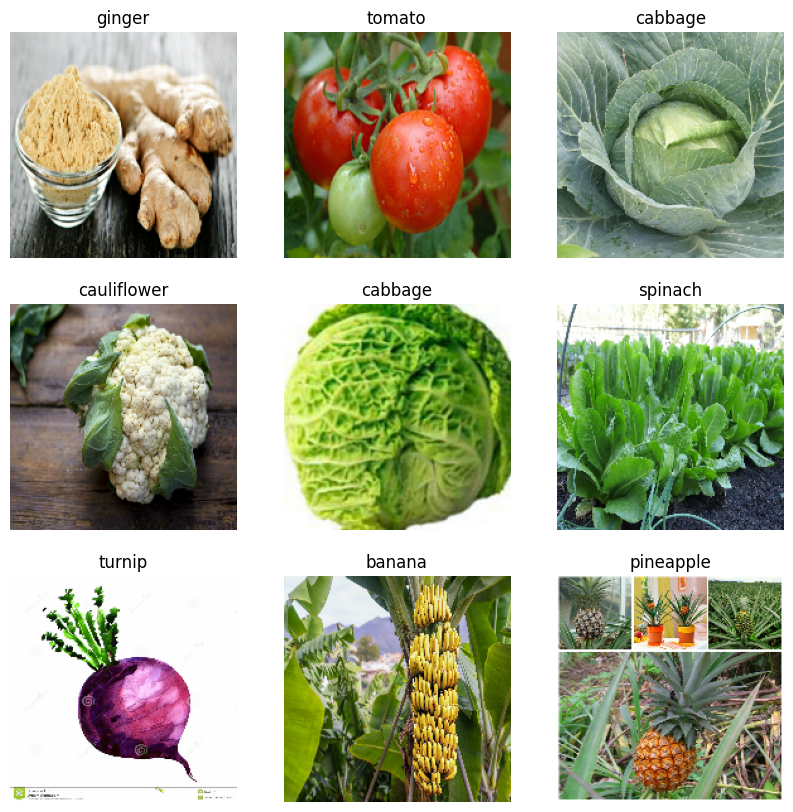

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train #180 is height 180 width and 3 is image is 3d RGB

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(data_train, validation_data=data_val, epochs=25)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 518s 5s/step - accuracy: 0.0603 - loss: 3.7065 - val_accuracy: 0.3390 - val_loss: 2.6102
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.2435 - loss: 2.6669 - val_accuracy: 0.5783 - val_loss: 1.6708
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.4600 - loss: 1.9057 - val_accuracy: 0.7806 - val_loss: 0.8531
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.6548 - loss: 1.1767 - val_accuracy: 0.8661 - val_loss: 0.5626
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.8208 - loss: 0.6686 - val_accuracy: 0.9060 - val_loss: 0.4726
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8773 - loss: 0.4511 - val_accuracy: 0.9373 - val_loss: 0.3957
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9121 - loss: 0.3197 - val_accuracy: 0.9516 - val_loss: 0.3881
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.9455 - loss: 0.2388 - val_accuracy: 0.9516 - v

Text(0.5, 1.0, 'Loss')

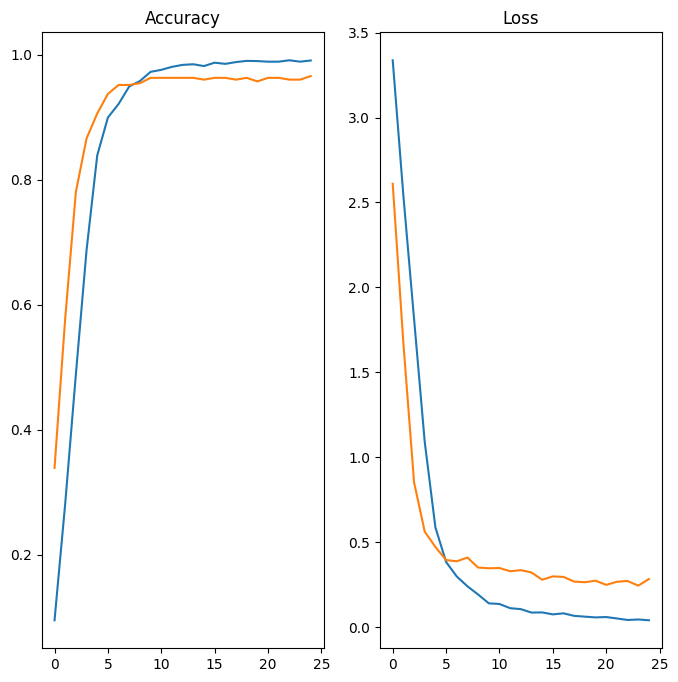

In [ ]:
epochs_range = range(25)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:
from google.colab import files
uploaded = files.upload()   # This will open a file picker

# After upload, use the exact uploaded filename
image_path = "corn.jpg"

image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_bat = tf.expand_dims(img_arr, 0)

Saving corn.jpg to corn (1).jpg


In [ ]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 53.26


In [ ]:
model.save('Image_classify.keras')